In [90]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import glob
import os
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:

import sys
sys.path.append('/Users/user/repos/bulk-euclid-cutouts')
from bulk_euclid.utils import morphology_utils_ou_mer as m_utils  # try to keep this exactly like ou mer version
from bulk_euclid.utils import cutout_utils

In [93]:
def get_fits_data(fits_loc):
    with fits.open(fits_loc) as hdul:
        data = hdul[0].data
        assert data.min() < data.max()
        assert np.isnan(data).mean() < 0.1
    return data


In [94]:
lens_dir = '/Users/user/repos/bulk-euclid-cutouts/data/space_warps_colour_tests/lens_cutouts'
lens_vis_locs = glob.glob(lens_dir + '/VIS/*.fits')
lens_y_locs = glob.glob(lens_dir + '/Y/*.fits')
lens_j_locs = glob.glob(lens_dir + '/J/*.fits')
lens_h_locs = glob.glob(lens_dir + '/H/*.fits')
assert len(lens_vis_locs) == len(lens_y_locs) == len(lens_j_locs) == len(lens_h_locs)
lens_df = pd.DataFrame(data={'vis_loc': lens_vis_locs, 'y_loc': lens_y_locs, 'j_loc': lens_j_locs, 'h_loc': lens_h_locs})
lens_df['galaxy_name'] = lens_df['vis_loc'].apply(lambda x: os.path.basename(x).split('.')[0])
lens_df

,vis_loc,y_loc,j_loc,h_loc,galaxy_name
0,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_20178_DESI-sel
1,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_4400_DESI-sel
2,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_6013_DESI-sel
3,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_4310_DESI-sel
4,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_19064_DESI-sel
...,...,...,...,...,...
76,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_20271_DESI-sel
77,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_19108_DESI-sel
78,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_19343_DESI-sel
79,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,EUC_18116_DESI-sel


In [95]:
sim_dir = '/Users/user/repos/bulk-euclid-cutouts/data/space_warps_colour_tests/simulations_b12'

sim_subdirs = glob.glob(sim_dir + '/*')
sim_df = pd.DataFrame(data={'sim_subdir_loc': sim_subdirs})
sim_df['galaxy_name'] = sim_df['sim_subdir_loc'].apply(lambda x: x.split('/')[-1])
sim_df['vis_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_VIS.fits'
sim_df['y_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_Y.fits'
sim_df['j_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_J.fits'
sim_df['h_loc'] = sim_df['sim_subdir_loc'] + '/' + sim_df['galaxy_name'] + '_NIR_H.fits'

In [96]:
sim_df['galaxy_type'] = 'sim'
del sim_df['sim_subdir_loc']
lens_df['galaxy_type'] = 'real_lens'

df = pd.concat([sim_df, lens_df], axis=0).reset_index(drop=True)
df.sample(5)

,galaxy_name,vis_loc,y_loc,j_loc,h_loc,galaxy_type
2067,EUC_30154_DESI-sel_r1,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,sim
2117,EUC_30592_DESI-sel_r0,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,sim
2761,EUC_30373_DESI-sel_r0,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,sim
3097,EUC_30636_DESI-sel_r0,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,sim
4116,EUC_31212_DESI-sel_r1,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,/Users/user/repos/bulk-euclid-cutouts/data/spa...,sim


In [97]:
df['galaxy_name'].value_counts()

galaxy_name
EUC_30725_DESI-sel_r0    1
EUC_30724_DESI-sel_r1    1
EUC_30873_DESI-sel_r2    1
EUC_31260_DESI-sel_r3    1
EUC_30783_DESI-sel_r2    1
                        ..
EUC_30959_DESI-sel_r0    1
EUC_30197_DESI-sel_r1    1
EUC_30088_DESI-sel_r3    1
EUC_31124_DESI-sel_r0    1
EUC_19369_DESI-sel       1
Name: count, Length: 4371, dtype: int64

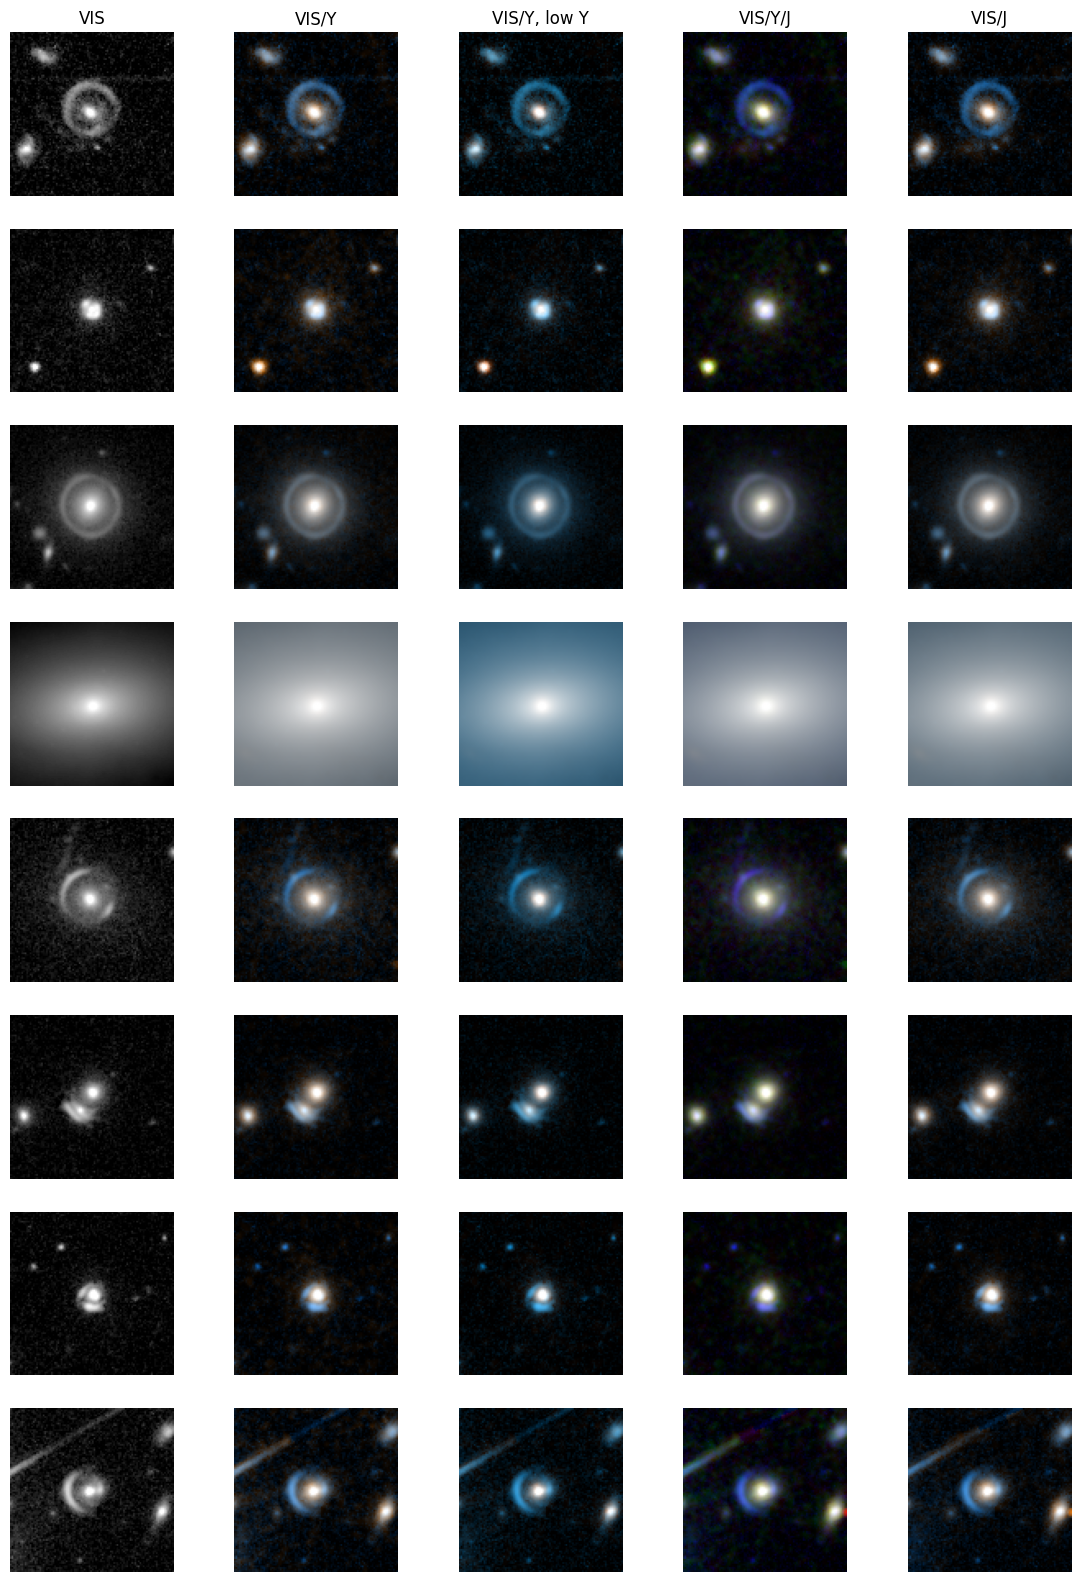

In [117]:
def show_examples(df):

    fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(14, 20))

    for row_n, row in enumerate(axes):

        galaxy = df.iloc[row_n]

        try:

            vis_im = get_fits_data(galaxy['vis_loc'])
            y_im = get_fits_data(galaxy['y_loc'])
            j_im = get_fits_data(galaxy['j_loc'])
        except Exception as e:
            print(e)
            continue

        if row_n == 0:
            row[0].set_title('VIS')
            row[1].set_title('VIS/Y')
            row[2].set_title('VIS/Y, low Y')
            row[3].set_title('VIS/Y/J')
            row[4].set_title('VIS/J')

        ax = row[0]
        vis_rgb = m_utils.make_vis_only_cutout(vis_im)
        ax.imshow(vis_rgb, cmap='gray')
        ax.axis('off')

        ax = row[1]
        vis_y_rgb = cutout_utils.make_composite_cutout(vis_im, y_im)
        ax.imshow(vis_y_rgb)
        ax.axis('off')

        ax = row[2]
        vis_y_rgb = cutout_utils.make_composite_cutout(vis_im, y_im, nisp_q=.05)
        ax.imshow(vis_y_rgb)
        ax.axis('off')

        ax = row[3]
        triple_rgb = cutout_utils.make_triple_cutout(vis_im, y_im, j_im, mid_q=0.2, long_q=0.1)
        ax.imshow(triple_rgb)
        ax.axis('off')

        ax = row[4]
        vis_y_rgb = cutout_utils.make_composite_cutout(vis_im, j_im, nisp_q=.1)
        ax.imshow(vis_y_rgb)
        ax.axis('off')


real_to_show = df[df['galaxy_type'] == 'real_lens'].sample(60).reset_index(drop=True)
sims_to_show = df[df['galaxy_type'] == 'sim'].sample(100).reset_index(drop=True)

# show_examples(real_to_show)
show_examples(sims_to_show)